# **Proyek Pertama Predictive Analysis Gemstone**

Nama: Cheliza Sriayu Simarsoit  
E-mail: chelizasriayusimarsoit@gmail.com  

# **1. Data Loading**

## 1.1 Kredensial Akun Kaggle

Pengaturan Kaggle Username dan Kaggle Key menggunakan library os untuk menghubungkan Kaggle dan Google Colab.

Dataset: https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'chelizasriayu'
os.environ['KAGGLE_KEY'] = '89f42eb9dc5758b888995e5c2d0e16c5'

## 1.2 Download Dataset

Dataset yang digunakan adalah [Gemstone Price Prediction](https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction) yang diambil dari platform Kaggle. File yang digunakan berupa file csv, yaitu `cubic_zirconia.csv`.



In [ ]:
!kaggle datasets download -d colearninglounge/gemstone-price-prediction -f cubic_zirconia.csv

  0% 0.00/444k [00:00<?, ?B/s]
100% 444k/444k [00:00<00:00, 88.2MB/s]


# **2. Data Understanding**

Melakukan import library yang dibutuhkan.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

## 2.1 Menampilkan Isi Dataset

In [ ]:
gp_prediction = pd.read_csv('cubic_zirconia.csv.zip')
gp_prediction.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


Menghapus kolom pertama yang berisikan nomor masing-masing data (`Unnamed`).

In [ ]:
gp_prediction.drop(gp_prediction.columns[[0]], axis = 1, inplace = True)

## 2.2 Exploratory Data Analysis

Exploratory data analysis (EDA) merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.

### 2.2.1 Deskripsi Variabel

Pengecekan informasi variabel dari dataset yaitu jumlah kolom, nama kolom, jumlah data per kolom dan tipe datanya.

In [ ]:
gp_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


Berdasarkan output di atas, terdapat 6 kolom dengan tipe data float64, 3 kolom dengan tipe data objek, dan 1 kolom dengan tipe data int64.

### 2.2.2 Deskripsi Statistik

Mengecek deskripsi statistik data dengan fitur describe().

In [ ]:
gp_prediction.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


Berdasarkan output diatas, didapatkan deskripsi statistik yaitu :
1. count : Jumlah sampel data
2. mean : Nilai rata-rata
3. std : Standar deviasi
4. min : Nilai minimum
5. 25% : Kuartil bawah/Q1
6. 50% : Kuartil tengah/Q2/median
7. 75% : Kuartil atas/Q3
8. max : Nilai maksimum

### 2.2.3 Menangani Missing Value

Mencari nilai yang hilang atau missing value pada kolom x, y, z bernilai 0.

In [ ]:
x = (gp_prediction.x == 0).sum()
y = (gp_prediction.y == 0).sum()
z = (gp_prediction.z == 0).sum()
 
print("Nilai 0 di kolom x ada: ", x)
print("Nilai 0 di kolom y ada: ", y)
print("Nilai 0 di kolom z ada: ", z)

Nilai 0 di kolom x ada:  3
Nilai 0 di kolom y ada:  3
Nilai 0 di kolom z ada:  9


Berdasarkan output diatas dapat dilihat terdapat missing value pada kolom x sebanyak 3, y sebanyak 3 dan z sebanyak 9.

Selanjutnya mengecek data dari kolom z yang memiliki jumlah missing value terbanyak.

In [ ]:
gp_prediction.loc[(gp_prediction['z']==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


Selanjutnya menghapus baris data pada kolom 'x', 'y', dan 'z' yang bernilai 0.

In [ ]:
gp_prediction = gp_prediction.loc[(gp_prediction[['x','y','z']]!=0).all(axis=1)]
gp_prediction.shape

(26958, 10)

Melakukan pengecekan ulang untuk missing value menggunakan describe().

In [ ]:
gp_prediction.describe()

,carat,depth,table,x,y,z,price
count,26958.000000,26261.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000
mean,0.798190,61.745345,57.455342,5.730105,5.733832,3.539238,3938.311262
std,0.477602,1.412395,2.231227,1.126714,1.164342,0.717838,4023.359737
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.712500,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5358.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


### 2.2.4 Menangani Outliers

Outliers merupakan sampel yang nilainya sangat jauh dari cakupan umum data utama dan hasil pengamatan yang kemunculannya sangat jarang dan berbeda dari data hasil pengamatan lainnya. 

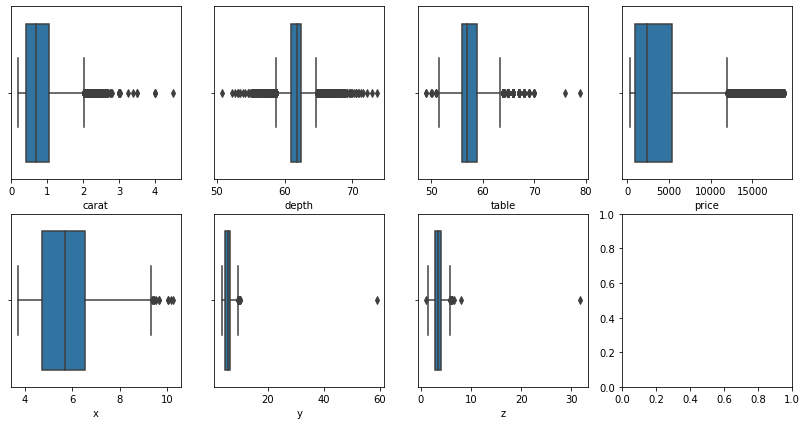

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(14, 7))

sns.boxplot(ax=axes[0, 0], x=gp_prediction.carat)
sns.boxplot(ax=axes[0, 1], x=gp_prediction.depth)
sns.boxplot(ax=axes[0, 2], x=gp_prediction.table)
sns.boxplot(ax=axes[0, 3], x=gp_prediction.price)

sns.boxplot(ax=axes[1, 0], x=gp_prediction.x)
sns.boxplot(ax=axes[1, 1], x=gp_prediction.y)
sns.boxplot(ax=axes[1, 2], x=gp_prediction.z)

Berdasarkan output diagram di atas terlihat bahwa ada outliers pada fitur carat, depth, table, price, x, y, dan z.

Membuat batas bawah dengan mengurangi Q1 dengan 1.5*IQR dan batas atas menambah 1.5*IQR dengan Q3.

Kemudian membuat rumus IQR (Inter Quartile Range)  
IQR = Q3 - Q1

In [ ]:
Q1 = gp_prediction.quantile(0.25)
Q3 = gp_prediction.quantile(0.75)
IQR = Q3 - Q1
gp_prediction = gp_prediction[~((gp_prediction<(Q1-1.5*IQR))|(gp_prediction>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah drop outliers
gp_prediction.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(23806, 10)

Setelah dilakukan pembersihan outliers, didapatkan data sebanyak 23806 sampel.

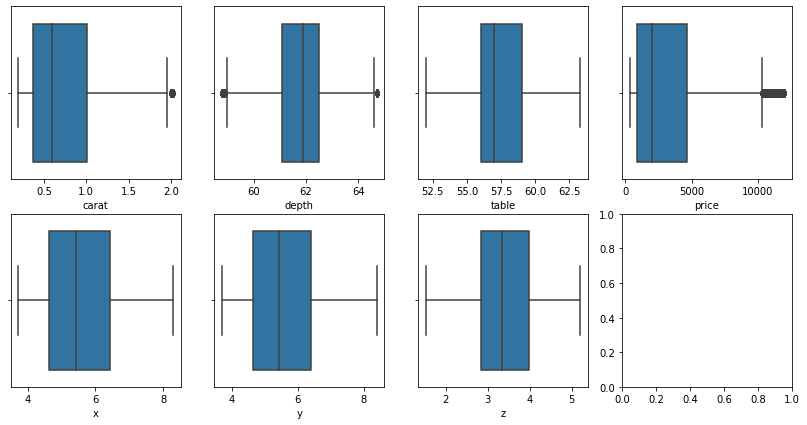

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(14, 7))

sns.boxplot(ax=axes[0, 0], x=gp_prediction.carat)
sns.boxplot(ax=axes[0, 1], x=gp_prediction.depth)
sns.boxplot(ax=axes[0, 2], x=gp_prediction.table)
sns.boxplot(ax=axes[0, 3], x=gp_prediction.price)

sns.boxplot(ax=axes[1, 0], x=gp_prediction.x)
sns.boxplot(ax=axes[1, 1], x=gp_prediction.y)
sns.boxplot(ax=axes[1, 2], x=gp_prediction.z)

Berdasarkan output diagram di atas, terlihat bahwa outliers telah dibersihkan meskipun masih ada sedikit outliers pada fitur carat, depth dan price, tetapi masih dapat ditoleransi.

### 2.2.5 Univariate Analysis

Membagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [ ]:
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

#### a. Categorical Features

           jumlah sampel  persentase
Ideal              10210        42.9
Premium             6070        25.5
Very Good           5484        23.0
Good                1872         7.9
Fair                 170         0.7


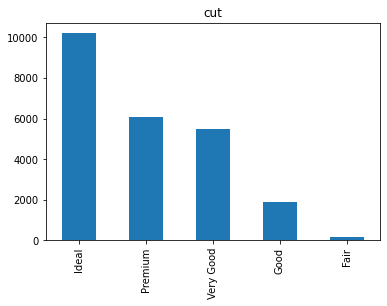

In [ ]:
feature = categorical_features[0]
count = gp_prediction[feature].value_counts()
percent = 100 * gp_prediction[feature].value_counts(normalize = True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind ='bar', title = feature);

Terdapat 5 kategori pada fitur cut, yaitu: Ideal, Premium, Very Good, Good, dan Fair dengan persentase tertinggi pada kategori Ideal sebesar 42.9%.

   jumlah sampel  persentase
G           5064        21.3
E           4465        18.8
F           4214        17.7
H           3557        14.9
D           3053        12.8
I           2303         9.7
J           1150         4.8


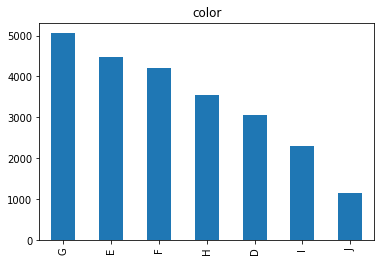

In [ ]:
feature = categorical_features[1]
count = gp_prediction[feature].value_counts()
percent = 100 * gp_prediction[feature].value_counts(normalize = True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind ='bar', title = feature);

Terdapat 7 kategori pada fitur color, yaitu: J, I, H, G, F, E, dan D dengan persentase tertinggi pada kategori G sebesar 21.3%.

      jumlah sampel  persentase
SI1            5835        24.5
VS2            5429        22.8
SI2            3698        15.5
VS1            3683        15.5
VVS2           2332         9.8
VVS1           1743         7.3
IF              837         3.5
I1              249         1.0


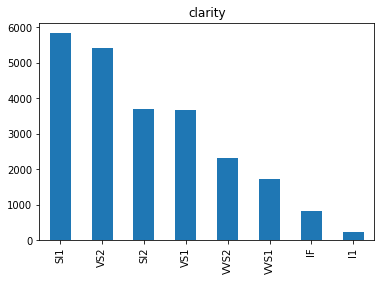

In [ ]:
feature = categorical_features[2]
count = gp_prediction[feature].value_counts()
percent = 100 * gp_prediction[feature].value_counts(normalize = True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind ='bar', title = feature);

Terdapat 8 kategori pada fitur clarity, yaitu: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, dan IF dengan persentase tertinggi pada kategori SI1 sebesar 24.5%.

#### b. Numerical Features

Menampilkan hisgtogram masing-masing fitur numerik.

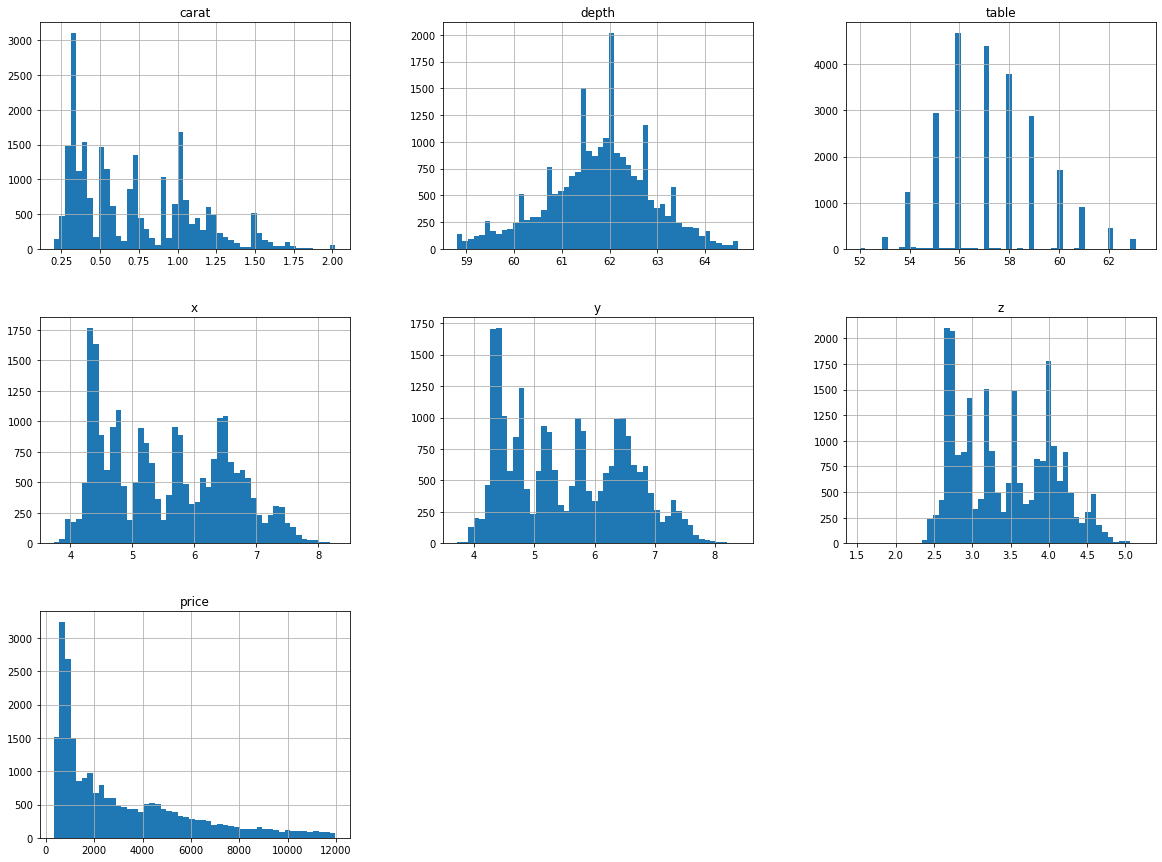

In [ ]:
gp_prediction.hist(bins = 50, figsize = (20,15))
plt.show()

Berdasarkan grafik histogram di atas, dapat disimpulkan sebagai berikut:
- Pada fitur carat menunjukkan histogram right-skewed.
- Pada fitur depth menunjukkan histogram zero-skewed atau simetris/normal.
- Pada fitur table menunjukkan histogram right-skewed.
- Pada fitur price menunjukkan histogram right-skewed.
- Peningkatan harga gemstone sebanding dengan penurunan jumlah sampel.

### 2.2.6 Multivariate Analysis

#### a. Categorical Features

Mengecek rata-rata harga terhadap masing-masing fitur kategori yaitu cut, color dan clarity untuk mengetahui pengaruh fitur tersebut terhadap harga.

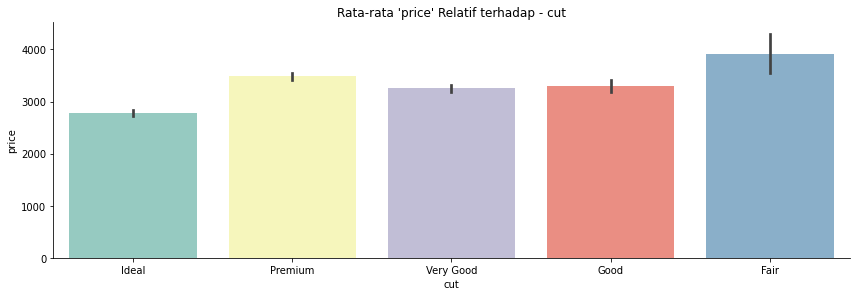

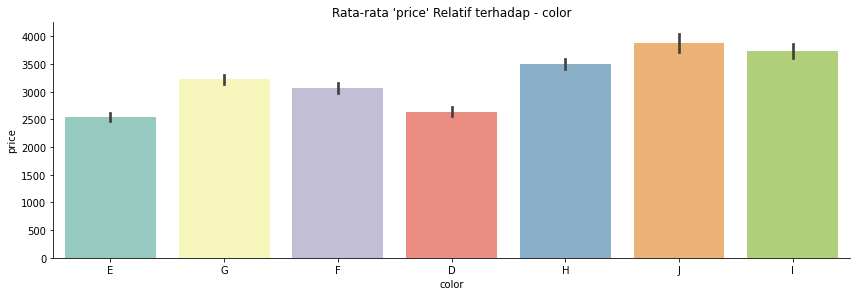

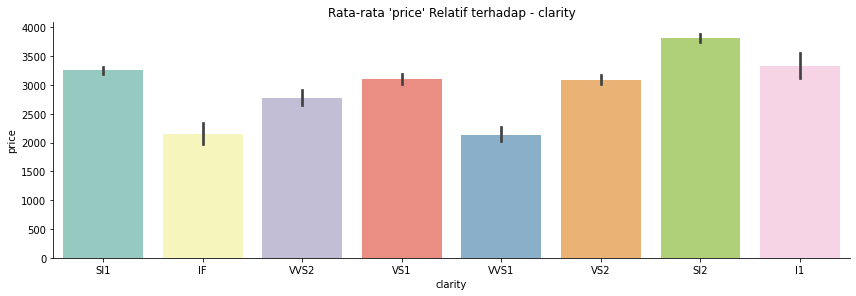

In [ ]:
cat_features = gp_prediction.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height=4, aspect=3, data=gp_prediction, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

Berdasarkan histogram di atas, dapat disimpulkan:
- Rata-rata fitur price terhadap fitur cut cenderung sama dengan rentang harga sekitar 2700 sampai 4000. Pada fitur cut, grade terendah yaitu Fair justru memiliki harga rata-rata paling tinggi sehingga fitur cut tidak terlalu berpengaruh terhadap rata-rata harga.
- Urutan kategori warna dari yang paling buruk hingga paling bagus adalah J, I, H, G, F, E, dan D. Pada fitur color, kualitas warna yang paling buruk yaitu J memiliki rata-rata harga yang paling mahal dari yang lainnya sehingga fitur color tidak terlalu berpengaruh terhadap harga.
- Urutan kategori clarity paling buruk ke yang paling baik, yaitu: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, dan IF. Pada fitur clarity, grade yang paling tinggi yaitu IF justru memiliki harga yang paling rendah sehingga fitur clarity memiliki pengaruh yang rendah juga terhadap harga.
- Kesimpulan dari fitur kategori adalah memiliki pengaruh yang rendah terhadap harga.

#### b. Numerical Features

Mengecek rata-rata harga terhadap masing-masing fitur numerik yaitu carat, depth, table, x, y, dan z untuk mengetahui pengaruh fitur tersebut terhadap harga.

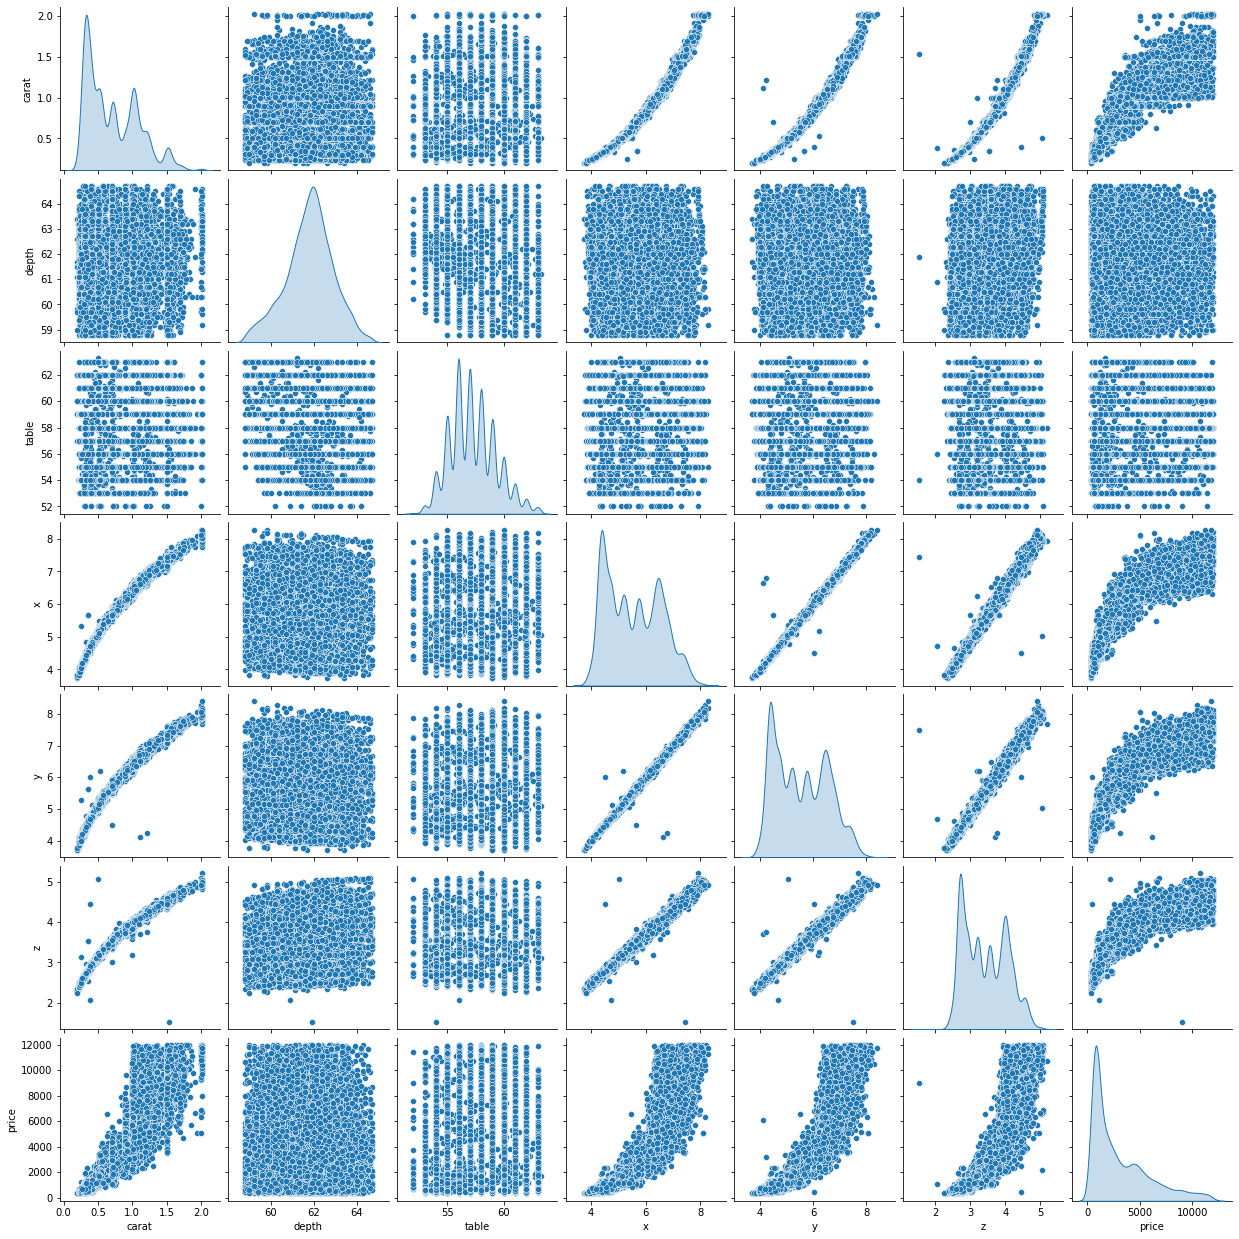

In [ ]:
sns.pairplot(gp_prediction, diag_kind='kde')

Berdasarkan grafik atau diagram di atas, diperoleh kesimpulan sebagai berikut:
- Pada fitur price terhadap carat, x, y dan z dapat dilihat memiliki pola sebaran data dengan korelasi positif.
- Pada fitur price terhadap depth dan table dapat dilihat memiliki pola sebaran data yang acak atau tidak beraturan sehingga tidak memiliki korelasi data.

### 2.2.7 Correlation Matrix

Pengecekan korelasi atau hubungan antar fitur numerik menggunakan heatmap correlation matrix.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

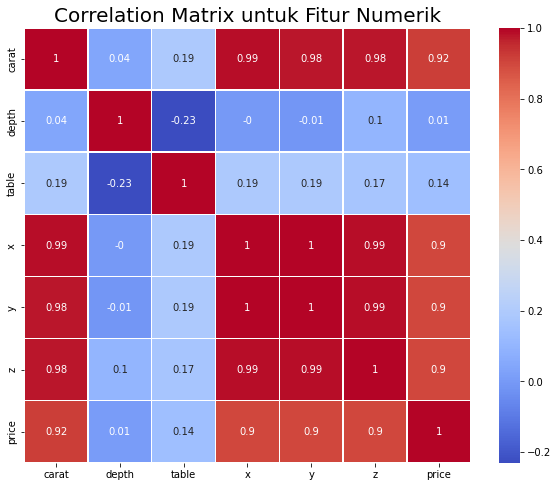

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = gp_prediction.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik", size=20)

Berdasarkan diagram heatmap di atas, disimpulkan bahwa:
- Rentang nilai dari 1 sampai -0.2.
- Jika nilai mendekati 1, maka korelasi antar fitur numerik semakin kuat positif.
- Jika nilai mendekati 0, maka korelasinya semakin rendah atau semakin tidak ada korelasi.
- Jika nilai mendekati -1, maka korelasi antar fitur numerik semakin kuat negatif.
- Korelasi antar fitur numerik yang memiliki korelasi kuat positif yaitu fitur price terhadap carat, x, y, dan z.
- Korelasi antar fitur numerik yang tidak memiliki korelasi yaitu fitur price terhadap depth dan table.

Menghapus fitur depth dan table pada dataset karena memiliki korelasi yang rendah terhadap fitur price.

In [ ]:
gp_prediction.drop(['depth', 'table'], inplace = True, axis = 1)
gp_prediction.head()

,carat,cut,color,clarity,x,y,z,price
0,0.30,Ideal,E,SI1,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,4.35,4.43,2.65,779


# **3. Data Preparation**

## 3.1 Encoding Fitur Kategori

Melakukan proses encoding pada fitur kategori cut, color, dan clarity.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
gp_prediction = pd.concat([gp_prediction, pd.get_dummies(gp_prediction['cut'], prefix ='cut')],axis = 1)
gp_prediction = pd.concat([gp_prediction, pd.get_dummies(gp_prediction['color'], prefix ='color')],axis = 1)
gp_prediction = pd.concat([gp_prediction, pd.get_dummies(gp_prediction['clarity'], prefix ='clarity')],axis= 1)
gp_prediction.drop(['cut','color','clarity'], axis = 1, inplace = True)
gp_prediction.head()

,carat,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,4.27,4.29,2.66,499,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,4.42,4.46,2.70,984,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,6.04,6.12,3.78,6289,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.42,4.82,4.80,2.96,1082,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,4.35,4.43,2.65,779,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## 3.2 Reduksi Dimensi dengan PCA

Melakukan pengecekan pada fitur ukuran gemstone yaitu fitur x, y, dan z.

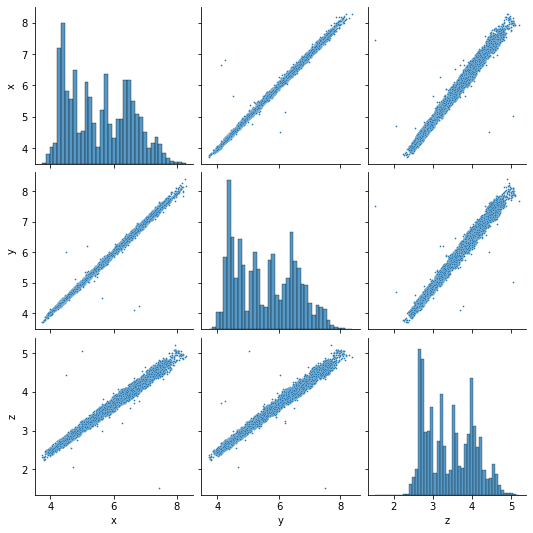

In [ ]:
sns.pairplot(gp_prediction[['x','y','z']], plot_kws = {"s": 3});

Teknik reduksi dimensi adalah mengurangi jumlah fitur dengan tetap mempertahankan informasi pada data. Teknik pengurangan dimensi yang digunakan dalam kasus ini adalah Principal Component Analysis (PCA) untuk mereduksi dimensi, mengekstraksi fitur, dan mentransformasi data dari “n-dimensional space” ke dalam sistem berkoordinat baru dengan dimensi m, di mana m lebih kecil dari n.

In [ ]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 3, random_state = 123)
pca.fit(gp_prediction[['x','y','z']])
princ_comp = pca.transform(gp_prediction[['x','y','z']])

Mendapatkan proporsi informasi dari ketiga komponen yaitu x, y, dan z.

In [ ]:
pca.explained_variance_ratio_.round(3)

array([0.998, 0.002, 0.001])

Membuat fitur baru untuk menggantikan fitur x, y, dan z yaitu dimension.

In [ ]:
pca = PCA(n_components = 1, random_state = 123)
pca.fit(gp_prediction[['x','y','z']])
gp_prediction['dimension'] = pca.transform(gp_prediction.loc[:, ('x','y','z')]).flatten()
gp_prediction.drop(['x','y','z'], axis = 1, inplace = True)

## 3.3 Train-Test-Split

Membagi dataset menjadi data latih dan data uji kemudian menampilkan total dataset, total data latih dan total data uji.

In [ ]:
from sklearn.model_selection import train_test_split
 
X = gp_prediction.drop(["price"],axis =1)
y = gp_prediction["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 23806
Total # of sample in train dataset: 21425
Total # of sample in test dataset: 2381


## 3.4 Standarisasi

Melakukan standarisasi pada fitur numerik yaitu carat dan dimension menggunakan StandardScaler untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma.

In [ ]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['carat', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,dimension
18677,0.827437,0.987784
17512,2.106236,1.748637
20365,-0.504646,-0.343164
21010,1.333628,1.299652
18132,2.106236,1.765440


In [ ]:
X_train[numerical_features].describe().round(4)

,carat,dimension
count,21425.0000,21425.0000
mean,-0.0000,-0.0000
std,1.0000,1.0000
min,-1.3572,-1.8508
25%,-0.9043,-0.9307
50%,-0.2915,-0.1288
75%,0.8008,0.8825
max,3.4916,2.7660


# **4. Model Development**

Mempersiapkan dataframe untuk menganalisis ketiga model yang akan digunakan yaitu K-Nearest Neighbor (KNN), Random Forest, Boosting Algorithm.

In [ ]:
models = pd.DataFrame(index = ['train_mse', 'test_mse'],
                      columns = ['KNN', 'RandomForest', 'Boosting'])

## 4.1 Algoritma K-Nearest Neighbor (KNN)

Algoritma KNN menggunakan ‘kesamaan fitur’ untuk memprediksi nilai dari setiap data yang baru. KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k tetangga terdekat (dengan k adalah sebuah angka positif). 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## 4.2 Algoritma Random Forest

Algoritma random forest adalah salah satu algoritma supervised learning yang  digunakan untuk menyelesaikan masalah klasifikasi dan regresi. Random forest merupakan salah satu model machine learning yang termasuk ke dalam kategori ensemble (group) learning. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=50, max_depth=12, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train) 

## 4.3 Boosting Algorithm

Algoritma ini bertujuan untuk meningkatkan performa atau akurasi prediksi dengan menggabungkan beberapa model sederhana dan dianggap lemah (weak learners) sehingga membentuk suatu model yang kuat (strong ensemble learner).

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# **5. Evaluasi Model**

Melakukan proses scaling fitur numerik pada data uji agar skala antara data latih dan data uji sama.

In [ ]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Melakukan evaluasi model untuk ketiga algoritma yang digunakan yaitu K-Nearest Neighbor (KNN), Random Forest, Boosting Algorithm menggunakan metrik Mean Squared Error (MSE).

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN,202.514631,261.056355
RF,108.567674,191.358713
Boosting,924.027159,918.473432


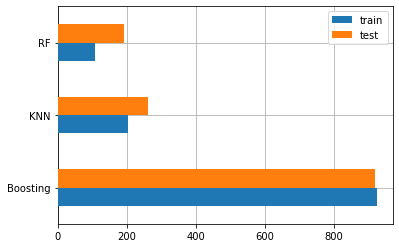

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Berdasarkan grafik di atas, dapat disimpulkan yaitu:
- Model dengan algoritma Random Forest memberikan nilai error yang paling kecil yaitu train sebesar 108.567674 dan test sebesar	191.358713.
- Model dengan algoritma KKN memberikan nilai error train sebesar 202.514631 dan test sebesar 261.056355.
- Model dengan algoritma Booting memberikan nilai error yang paling besar yaitu train sebesar 924.027159 dan test sebesar 918.473432.

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
8697,706,792.1,715.7,787.4


Berdasarkan output tabel di atas dapat dilihat bahwa urutan algoritma yang paling mendekati dengan nilai y_true adalah Random Forest. Nilai y_true sebesar 706 dan nilai prediksi Random Forest sebesar 715.7.